# DS 3025 Final Project: Neural Network From Scratch

**General Instructions:** For this project, you will be creating the code for a simple Neural Network from scratch. The beginning portion of the project will match closely with what we have completed together during Lab. You will first create some helper functions then the larger building blocks of the network. After creating the network, you will be asked to tweak different pieces and run experiments to demonstrate your understanding of the underlying code.

**Type the Honor Pledge Here:**

### Tips for Success on this Project:
- use `print` statements to debug your code
- code small helper functions first and check if correct by running practice tests
- check if matrices are the **correct dimension for matrix multiplication** by printing the matrix or printing the dimension of the matrix (may need to transpose by using `matrix.T` in some cases)
- make sure you understand the math behind feeding forward and backpropogating before implementing the `feed_forward` and `gradient` functions
- The internet is your friend! Look up unknown python syntax and error messages  
- Other potentially useful functions: `np.dot`, `np.random.normal`, `np.exp`, `pd.DataFrame`
- Ensure your cost function is correct (it might be different from lab). Ensure you are doing MSE and dividing by the length of the each dataset at the proper time

### Additional Help with Python Coding:
Reach out to Ali Rivera (wat6sv@virginia.edu)! She is very nice and hosts python office hours from 12-1 on Wednesdays in Room 300 (she has snacks!)

### Grading

* Only build off of the code and functions given to you in lab.
* Do not import any additional modules/functions aside from the ones given at the beginning of the project.
* Do not use any additional data aside from what we define to be X and Y in the beginning for your training. You will receive a 0 if you add columns or create new testing data in any way.
* Points will be deducted if your code is not reproducible. I.e. your output should look the same as when we run your uploaded notebook in google colab (remember to keep your random seed as we have set it to 42). Before you submit - restart your kernel in Google Colab and run all of your code from bottom to top - if nothing changes, you are good to go.
* Points will be deducted for redundant code, i.e. repeating function definitions in every code block. Note: Re-defining functions to add new parts is not considered redundant code.
* Your code has to work, but we are focused more on the summmary and explainations we ask you about the code. We want to know that you understand the ideas behind the code. When in doubt, document your through process and resources used. If you run into issues, detail them in your submission so we can give you partial credit.
* We will be testing your final model parameters on a synthetic dataset we have generated from the one you are given. Your model's accuracy on this new test set will be recorded and ranked across students from both sections. Your overall grade will be affected by where you fall in this rank. In order to perform well on this, you will need to ensure that your model's test accuracy is as high as possible without overfitting or underfitting your model.
* A ruberic with more specific details on grade brackets will follow.

# Project Overview

## Part 1:
Your goal for Part 1 will be to carefully copy over functions from Lab 11 & 12 and ensure all your functions are in working order for this particular data set and problem. The steps for this part will include:

- Load your data
- Define your helper funtions
- Create your "Major" functions (1 Hidden Layer Network)
- Test your network with the functions you created given a defined set of parameters

## Part 2:
Your goal for Part 2 will be to build off of the functions built in Lab (Part 1). This will include:

- Adding a new activaiton function (Hyperbolic Tangent)
- Creating a new neural network (2 Hidden Layer Network)
- Comparing the performance of the 1 vs 2 Hidden Layer Network.

## Part 3: Experimentation/Parameter Tuning (with 1-layer model)

For this section, you will be conduct 4 different experiments that test:
- A Baseline model
- Varying the Activation Functions
- Varying the Learning Rate
- Varying the \# of Hidden Layer Nodes

From each of these experiments, you will produce a graph, table, and summary.

## Part 4: Further Experimentation/Parameter Tuning

In this part you will experiment further to find the values of the parameters (activation function, epochs, learning rate, hidden nodes) that best train your model to produce the highest test accuracy ON OUR SYNTHETIC DATASET. This means that you need to find the parameters that not only produce the best test accuracy but also don't overfit the training data.

## Part 5: Comprehension Questions

You will be asked 3 comprehension questions, 2 will require code for you to answer.

#### Imports

In [ ]:
#### DO NOT ADJUST ####
# The only libraries we will be using
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.datasets import load_iris
import time

In [ ]:
#### DO NOT ADJUST ####
# Define seed
seed = 42

### Load Data

For this project, we're using a new dataset to classify wine type between red and white. We have the following measurements of each wine "subject" (`fixed acidity`, `volatile acidity`, `residual sugar`, `chlorides`, `alcohol`, `quality`). Our goal is to predict the type of wine (red or white). This means we are dealing with a binary classification problem. Our model will output a probability that it a red wine (because red is coded as 1).

Below is the code to load in the data sets to X and Y. Do **not** change the code below.

In [ ]:
#### DO NOT ADJUST ####

## Load in the Wine Quality Data
red = pd.read_csv('https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/refs/heads/master/winequality-red.csv', sep =';')
white = pd.read_csv('https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/refs/heads/master/winequality-white.csv', sep =';')

# Random sample to decrease the sample size of red and white to 200 per class
red = red.sample(200, random_state=seed)
red.drop(['density', 'pH', 'citric acid', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates'], axis = 1, inplace = True)
white = white.sample(200, random_state=seed)
white.drop(['density', 'pH', 'citric acid', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates'], axis = 1, inplace = True)
print(white.columns)

# add columns for classification
red['type'] = 0
white['type'] = 1

# combine the data frames
X = pd.concat([red, white], axis=0)

# Now seperate X and Y
Y = X['type']
X = X.drop('type', axis=1)


Index(['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides',
       'alcohol', 'quality'],
      dtype='object')


# Part 1
Your goal for Part 1 will be to ensure all of your functions are in working order and lay the groundwork for what ranges your experimentation in Part 2 should fall in

- Convert your data to numpy and train/test split
- Define your helper funtions
- Create your "Major" functions (1 Hidden Layer Network)
- Test your network with the functions you created given a defined set of parameters

### Q1 (a) . Split the data into test (`X_test`, `Y_test`) and train (`X_train`, `Y_train`) datasets. Standardize the training and testing data. ENSURE THAT YOUR VARIABLES ARE NAMED CORRECTLY

In [ ]:
# Convert X and Y from pandas to numpy arrays
X = X.to_numpy()
Y = Y.to_numpy()

# Train/test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# Standardize X_train and X_test
x_train_mean = np.mean(X_train, axis = 0)
x_train_std = np.std(X_train, axis = 0)
X_train = (X_train - x_train_mean) / x_train_std
X_test = (X_test - x_train_mean) / x_train_std

# Reshape Y_train and Y_test to nx1 matrices
Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)

#### DO NOT ADJUST ####
# Check X Train and Test Shapes
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'Y_train shape: {Y_train.shape}') #notice how there's a 1 in the column space after reshaping
print(f'Y_test shape: {Y_test.shape}') #notice how there's a 1 in the column space after reshaping

X_train shape: (320, 6)
X_test shape: (80, 6)
Y_train shape: (320, 1)
Y_test shape: (80, 1)


####**Q1 (b): What is going to be your number of input and output nodes - **Why? (be careful with your reasning for your output nodes)****

**Answer:**


Input is going to be 6 because we have 6 variables and output is 1 since we have one target variable. (probability)

### Create the following Helper Functions:

Pay close attention to the formulas and directions. Do not change the names of these functions.

1. `sigmoid(x)`
1. `sigmoid_derivative(x)`
1. `relu(x)`
1. `relu_derivative(x)`
1. `ActivationFxn(x, activation_type)`
1. `ActivationFxnDerivative(x, activation_type)`
1. `cost(y, y_hat)`

#### Q3. Create a function called `sigmoid(x)`.

This will be one of your **activation functions** that takes some vector `x` and returns the sigmoid of the vector. The `sigmoid` function can be written as:

\begin{gather}
  \sigma(x) = \frac{1}{1 + e^{-x}}
\end{gather}

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

#### Q4. Create a function called `sigmoid_derivative(x)`.

This function will calculate the derivative of the activation function for backpropogation in the network at some point, `x`. The function should return the derivative of the sigmoid function at that point. The derivative of the Sigmoid function is written as:

\begin{gather}
  \sigma^\prime (x) = \sigma(x) * (1 - \sigma(x))
\end{gather}

In [ ]:
def sigmoid_derivative(x):
  return sigmoid(x)*(1-sigmoid(x))

#### Q5. Create a function called `relu(x)`.

This function will calculate and return the `ReLU` of some input value `x`. The ReLU function can be written as:

\begin{gather}
  \sigma(x) = \begin{cases} x, & x > 0 \\ 0, & x \leq 0 \end{cases} = max(0, x)
\end{gather}

In [ ]:
def relu(x):
  return x*(x>0)

#### Q6. Create a function called `relu_derivative(x)`.

This will calculate the derivative of the `ReLU` function for the given input. The derivative of ReLU can be written as:

\begin{gather}
  \sigma^{\prime}(x) = \begin{cases} 1, & x > 0 \\ 0, & x \leq 0 \end{cases}
\end{gather}

In [ ]:
def relu_derivative(x):
  return 1*(x>0)

#### Q7. Create a function called `ActivationFxn(x, activation_type)`.

This will be a function that combines the two activation functions that you defined above. Given the activation type determined by `activation_type` (either `sigmoid` or `relu` for now), the function should calculate the activation function of the value `x`. Hint: You can use `if` statements to check for what type of `acitvation_type` the user wants. Make sure to have a condition for when the provided `activation_type` is not valid.

In [ ]:
# Combine your activation functions into one function
def ActivationFxn(x, activation_type):
  if activation_type == 'relu':
    return relu(x)
  elif activation_type == 'sigmoid':
    return sigmoid(x)
  else:
    print('Error: Activation Function Type not valid')

#### Q8. Create a function called `ActivationFxnDerivative(x, activation_type)`.

This will be a function that combines the two activation functions derivatives that you defined above. Given the activation type determined by `activation_type` (either `sigmoid` or `relu` for now), the function should calculate the activation function derivative of the value `x`. Hint: You can use `if` statements to check for what type of `acitvation_type` the user wants. Make sure to have a condition for when the provided `activation_type` is not valid.

In [ ]:
# Define the derivative of the activation function
def ActivationFxnDerivative(x, activation_type):
  if activation_type == 'relu':
    return relu_derivative(x)
  elif activation_type == 'sigmoid':
    return sigmoid_derivative(x)
  else:
    print('Error: Activation Function Type not valid')

#### Q9. Create a function called `cost(y, y_hat)`.

For this function, `y` is the true wine type and `y_hat` is the predicted probability of a red wine. The equation should use is:

\begin{gather}
  \text{cost}(x) = \sum (y - y\_\text{hat})^2
\end{gather}


In [ ]:
def cost(y, y_hat):
  return np.sum((y - y_hat)**2)

### Major Functions

Congratulations! You've finished creating the helper functions that we will need throughout building this neural network. Next, we will work on the larger functions that we will need. The list of the functions you will develop is shown below along with each of the inputs they will take.

1. `forward_propagation(x, activation_type)`
1. `output(X, activaiton_type)`
1. `gradient(x, y, a1, a2, activation_type)`
1. `train(inputs, outputs, learning_rate, epochs, activation_type)`
1. `test(inputs, outputs, activation_type)`
1. `GenerateAllWeights(input_nodes, hidden_nodes, output_nodes, seed)`

#### Q10. Create a function called `forward_propogation(x, activation_type)`.

The function should take an input vector `x` and apply a linear transformation and the specified activation function for the input layer to the hidden layer. The function should return the output values from the input to hidden neurons and hidden to output neuron(s). For example, the output of the 1st pass (input to hidden) could be called `z1` for before activation and `a1` = $(a_{11}, a_{12}, a_{13})$ for after activation. Likewise, the 2nd pass (output from the hidden to output) could be called `z2` before activation and `a2` = $(a_{21})$ after.

In [ ]:
from binascii import b2a_base64
def forward_propagation(x, activation_type):
  # input to hidden layer
  z1 = np.dot(W1, x) + b1
  a1 = ActivationFxn(z1, activation_type)

  # hidden to output layer
  z2 = np.dot(W2, a1) + b2
  a2 = ActivationFxn(z2, activation_type)

  return a1, a2, z1, z2

### Q11. Create a function called `output(X, activation_type)`.

The function should take in a data matrix, `X`. It should loop over each row of the matrix, `X`. For each row or sample, calculate the forward propogation using the function you defined above and the activation function determined by `activation_type`. Catch all elements that the `forward_propogation` function returns. Save the final output from the output layer, `a2`, into a list. The `output()` function should ultimately return this list of outputs. For a sanity check, you can make sure that the output list is the same length as the number of rows in `X`.

In [ ]:
def output(X, activation_type):
  # 1. Define an empty array (out) to append each value for each sample in the data
  out = np.array([])

  # 2. Loop over each sample of X
  for j in range(X.shape[0]):

      # 3. Select an element and reshape so that it is input_nodes x 1
      x = X[j].reshape(input_nodes, 1)

      # 4. Pass your value, x, through the forward propogation function
      a1, a2, z1, z2 = forward_propagation(x, activation_type)

      # 5. Append your final result from the forward propogation to the out list
      out = np.append(out,a2)
  return out

#### Q12. Create a function to calculate the gradient of the network. This function should be called `gradient(x,y,a1,a2,z1, z2, activation_type)`.

It should take inputs `x`, `y`, `a1`, `a2`, `z1`, and `z2`. `x` is the input data to the layer. This is a given row of our data matrix. `y` is the true value of the wine class. `z1` is the value calculated from the pass from the input layer to the output layer before activation. `a1` is the result of `z1` being passed into the activation function. `z2` is the value from the hidden layer to the output layer before activation. `a2` is the reuslt from passing `z2` into the activation function and represents what the prediction is. Overall, this function should calculate what the gradient is for each weight and bias. For equations, refer back to Lab 11 & 12. The function should return the direction of the gradient for each weight matrix, labeled `dW1`, `dW2`, and biases labeled `db1`, `db2`.

In [ ]:
# Define the gradient function
def gradient(x, y, a1, a2, z1, z2, activation_type):
  # Find the derivative of the second part
  delta2 = (a2 - y) * ActivationFxnDerivative(z2, activation_type)
  dW2 = np.dot(delta2, a1.T)
  db2 = delta2

  # Find the derivative of the first part
  delta1 = np.dot(W2.T, delta2) * ActivationFxnDerivative(z1, activation_type)
  dW1 = np.dot(delta1, x.T)
  db1 = delta1

  # return each of the derivatives
  return dW1, db1, dW2, db2

#### Q13. Create a function that trains the network. It should be called `train(x_train, y_train, x_test, y_test, learning_rate, epochs, activation_type)`.

The function should apply each of the helper functions you defined before in the correct order. The function should return the cost values for both the training and testing data in lists.

In [ ]:
# Perform gradient descent
def train(x_train, y_train, x_test, y_test, learning_rate, epochs, activation_type):

  global W1
  global b1
  global W2
  global b2

  # create an array for the errors
  train_cost = []
  test_cost = []

  for i in range(epochs):
      # 1. Initialize the gradients vectors
      dW1 = np.zeros_like(W1)
      db1 = np.zeros_like(b1)
      dW2 = np.zeros_like(W2)
      db2 = np.zeros_like(b2)

      train_costs = 0

      # 2. Loop over each sample to calculate the gradient
      for j in range(x_train.shape[0]):

          # 3. Reshape the data
          x = x_train[j].reshape(input_nodes, 1)
          y_true = y_train[j].reshape(output_nodes, 1)

          # 4. Calculate the Forward propagation
          a1, a2, z1, z2 = forward_propagation(x, activation_type)

          # 5. Compute the cost
          row_cost = cost(y_true, a2) #remember what your mse is calculating
          train_costs += row_cost

          # 6. Compute the Gradient
          dW1__j, db1__j, dW2__j, db2__j = gradient(x, y_true, a1, a2, z1, z2, activation_type)

          # 7. Accumulate the gradients for samples
          dW1 += dW1__j
          db1 += db1__j
          dW2 += dW2__j
          db2 += db2__j

      # Calculate test costs
      y_test_pred = output(x_test, activation_type)  # Forward pass for test set
      test_cost_val = cost(y_test, y_test_pred.reshape(-1, 1)) #remember what your mse is calculating
      test_cost += [test_cost_val]

      # 8. Average the gradients over all samples
      dW1 /= x_train.shape[0]
      db1 /= x_train.shape[0]
      dW2 /= x_train.shape[0]
      db2 /= x_train.shape[0]

      # 9. Update the weights and biases: **BACKPROPOGATION**
      W1 -= learning_rate*dW1
      b1 -= learning_rate*db1
      W2 -= learning_rate*dW2
      b2 -= learning_rate*db2

      # 10. get the mean cost for that epoch and append to errors
      train_cost += [train_costs]

  return train_cost, test_cost

#### Q14. Create a function to test your network. It should be called `test(inputs, outputs, activation_type)`.

You can run the function after training to see if neural network works well on other data points that it didn't see during training. For inputs, it should take in test `inputs` (x values) and `outputs` (y values) and print the `percent_correct`.

In [ ]:
def test(inputs, outputs, activation_type):
    correct = 0
    for x,y in zip(inputs,outputs):
        x = np.reshape(x, (len(x),1))
        a1, a2, z1, z2 = forward_propagation(x, activation_type)
        if (a2 >.5) & (y ==1):
            correct = correct + 1
        elif (a2<=.5) & (y == 0):
            correct = correct + 1
    print("percent correct:", 100*correct/len(inputs))

#### Q15. Create a function that initializes the values of the weights `W1`, `W2` and biases `b1`, `b2`. It should be called `GenerateAllWeights(input_nodes, hidden_nodes, output_nodes, seed)`

**NOTE**: make sure to re-run `GenerateAllWeights` each time you train the network (otherwise `train` function will have edited the matices and you want them to start random)

In [ ]:
def GenerateAllWeights(input_nodes, hidden_nodes, output_nodes, seed):
  np.random.seed(seed)
  # Calculate your weights
  W1 = np.random.randn(hidden_nodes, input_nodes)
  W2 = np.random.randn(output_nodes, hidden_nodes)

  # Calculate your biases
  b1 = np.zeros((hidden_nodes, 1))
  b2 = np.zeros((output_nodes, 1))

  return W1, W2, b1, b2

### Q16. Train the Network, putting all of your functions together

Next, we will put all of our functions together to actually train the neural network. Start by defining the number of epochs and the learning rate. For this part, use values of `hidden_nodes=3`, `epochs=500`, `learning_rate=0.1`, and `activation_type = 'sigmoid'`. Once the parameters are set, go ahead and define your weights, train the network, and plot the MSE for the training and testing set respecively.

In [ ]:
# Define the number of input, hidden, and output nodes (note: nodes not layers)
input_nodes = 6
hidden_nodes = 3
output_nodes = 1

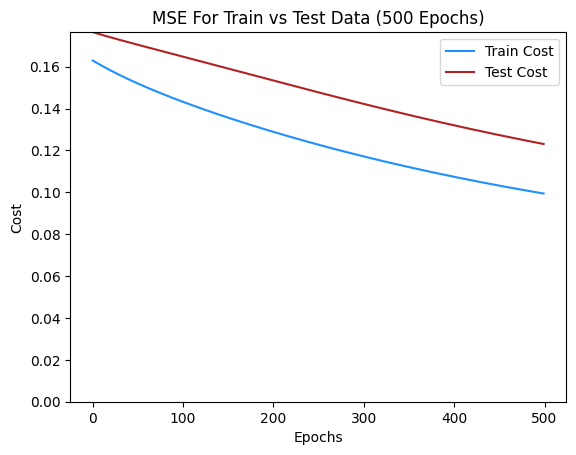

In [ ]:
# Define your parameters

epochs = 500
learning_rate = 0.1
activation_type = 'sigmoid'
seed = 42

# Define your weights and biases
W1, W2, b1, b2 = GenerateAllWeights(input_nodes, hidden_nodes, output_nodes, seed)

# Train your network
start_time = time.time() # start time

train_cost, test_cost = train(X_train, Y_train, X_test, Y_test, learning_rate, epochs, activation_type)

end_time = time.time() #end time
elapsed_time = end_time - start_time

# Adjust costs where necessary (be mindful of what your cost function is calculating)
train_cost = np.array(train_cost) / X_train.shape[0]
test_cost = np.array(test_cost) / X_test.shape[0]

#### DO NOT ADJUST ####
plt.plot(np.arange(epochs), train_cost, label = 'Train Cost', color = 'dodgerblue')
plt.plot(np.arange(epochs), test_cost, label = 'Test Cost', color = 'firebrick')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title(f'MSE For Train vs Test Data ({epochs} Epochs)')
plt.ylim([0, np.max([np.max(test_cost), np.max(train_cost)])])
plt.legend()
plt.show()

#### Q17. Test the Network after Training

Now that you've trained the model, we can test it. Use the `test` function on the `x_test` and `y_test` values.

In [ ]:
test(X_test, Y_test, activation_type)

percent correct: 88.75


# Part 2
Your goal for Part 2 will be to build off of the functions built in Lab 11 & 12 (Part 1).

- Re-define your activation function**s** by adding the Hyperbolic Tangent (`tanh`)
- Create fucntions for forward propogation, output, gradient, and train that allow for a second hidden layer
- Compare your 2-hidden-layer model to your 1-hidden-layer model (using the same parameters)

### Creating a New Activation Function

### Q1. There are other activation functions than just Sigmoid and ReLU. One we talked about in class is the Hyperbolic Tangent function `tanh()`. Create a new function called `tanh()`.

Note: for this question, and this question only, you are restricted to only using the `np.exp()` function from Numpy. Do **not** directly use `np.tanh()` for this question.

Hint: The equation for the hyperbolic tangent is:

\begin{gather}
  \sigma(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
\end{gather}

In [ ]:
def tanh(x):
  return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

#### Q2. Plot your activation function for $X \in [-10, 10]$ with 100 data points. This is a way to confirm that your function behaves how the hyperbolic tanh does.

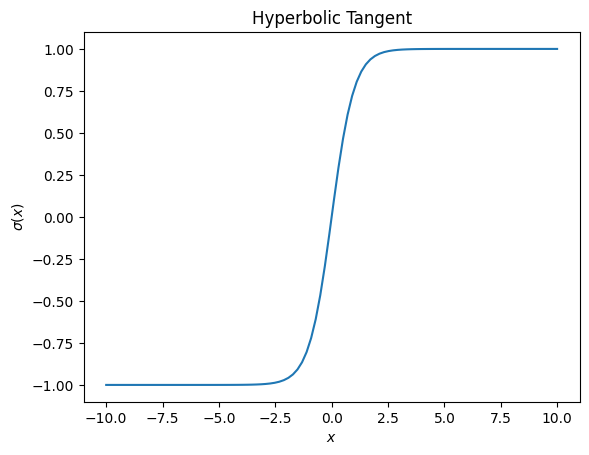

In [ ]:
# create X vector as described above (refer to Lab 12 for help) to define the first parameter of the plot
X = np.linspace(-10, 10, 100)

# use the function you just created for tanh to define the second parameter of the plot
tanh_vals = tanh(X)

#### DO NOT ADJUST ####
plt.plot(X, tanh_vals)
plt.title(r'Hyperbolic Tangent')
plt.xlabel(r'$x$')
plt.ylabel(r'$\sigma(x)$')
plt.show()

#### Q3. Using your `tanh()` function, add it to the `ActivationFxn()` function. The `activation_type` parameter should be `tanh`.

In [ ]:
# Add tanh as an option to your ActivationFxn (after relu and sigmoid)
def ActivationFxn(x, activation_type):
  if activation_type == 'relu':
    return relu(x)
  elif activation_type == 'sigmoid':
    return sigmoid(x)
  elif activation_type == 'tanh':
    return tanh(x)
  else:
    print('Error: Activation Function Type not valid')

#### Q4. Define a `tanh_derivative()` function.

The derivative of the hyperbolic tangent is the hyperbolic secant. The function can be defined as:

\begin{gather}
  \sigma^{\prime} (x) = \frac{2}{e^{x} + e^{-x}}
\end{gather}

In [ ]:
def tanh_derivative(x):
  return 2/(np.exp(x)+np.exp(-x))

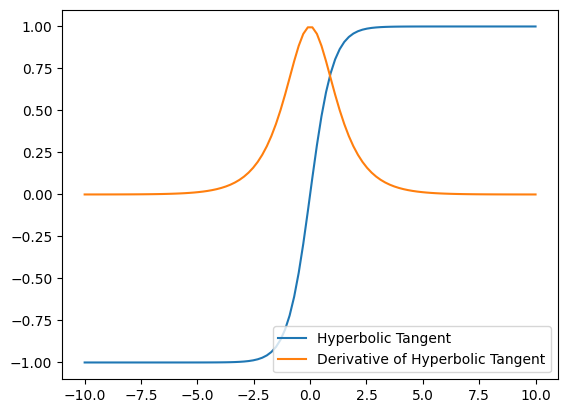

In [ ]:
# Call the tanh function on X (X is already defined above) to define the parameter needed for the first plot
tanh_values = tanh(X)
# Call the tanh derivative function on X to define the parameter needed for the second plot
tanh_derivative_values = tanh_derivative(X)

#### DO NOT ADJUST ####
plt.plot(X, tanh_values, label = 'Hyperbolic Tangent')
plt.plot(X, tanh_derivative_values, label = 'Derivative of Hyperbolic Tangent')
plt.legend()
plt.show()

#### Q5. Add the `tanh_derivative()` to the `ActivaitonFxnDerivative()` function. The `activation_type` value should be called `tanh`.

In [ ]:
# Define the derivative of the activation function
def ActivationFxnDerivative(x, activation_type):
  if activation_type == 'relu':
    return relu_derivative(x)              # ReLU
  elif activation_type == 'sigmoid':
    return sigmoid_derivative(x) # Sigmoid
  elif activation_type == 'tanh':
    return tanh_derivative(x) # Tanh
  else:
    print('Error: Activation Function Type not valid')

### Creating a 2 Hidden Layer Network

#### Q6. Edit your network to include an additional hidden layer. This includes adding more weights and biases. Add a suffix `2` to the end of each function to indicate that it is the function for your 2 hidden layer network. The functions for you to change are:

* `GenerateAllWeights()` $\rightarrow$ `GenerateAllWeights_2()`
* `forward_propogration()` $\rightarrow$ `forward_propagation_2()`
* `output()` $\rightarrow$ `output_2()`
* `gradient()` $\rightarrow$ `gradient_2()`
* `train()` $\rightarrow$ `train_2()`
* `test()` $\rightarrow$ `test_2()`

NOTE: Be careful to use the new functions with a suffix of `2` when you want to work with the 2 hidden layer network. If you accidentatly use the original functions with no suffix, you will run into errors. If you have errors that you run into, make sure to double check that you're using the new functions in all of the necessary positions.

Start with both hidden layers containing `3` nodes.

In [ ]:
# define network structure
input_nodes = 6
first_hidden_nodes = 3
second_hidden_nodes = 3
output_nodes = 1

In [ ]:
def GenerateAllWeights_2(input_nodes, first_hidden_nodes, second_hidden_nodes, output_nodes, seed):
  np.random.seed(seed)
  # Calculate your weights
  W1 = np.random.randn(first_hidden_nodes, input_nodes)
  W2 = np.random.randn(second_hidden_nodes, first_hidden_nodes)
  W3 = np.random.randn(output_nodes, second_hidden_nodes)

  # Calculate your biases
  b1 = np.zeros((first_hidden_nodes, 1))
  b2 = np.zeros((second_hidden_nodes, 1))
  b3 = np.zeros((output_nodes, 1))

  return W1, W2, W3, b1, b2, b3

In [ ]:
def forward_propagation_2(x, activation_type):
  # input to first hidden layer
  z1 = np.dot(W1, x) + b1
  a1 = ActivationFxn(z1, activation_type)

  # first hidden to second hidden layer
  z2 = np.dot(W2, a1) + b2
  a2 = ActivationFxn(z2, activation_type)

  # second layer to output
  z3 = np.dot(W3, a2) + b3
  a3 = ActivationFxn(z3, activation_type)

  return a1, a2, a3, z1, z2, z3

In [ ]:
def output_2(X, activation_type):
  # 1. Define an empty array (out) to append each value for each sample in the data
  out = np.array([])

  # 2. Loop over each sample of X
  for j in range(X.shape[0]):

      # 3. Select an element and reshape so that it is input_nodes x 1
      x = X[j].reshape(input_nodes, 1)

      # 4. Pass your value, x, through the forward propogation function
      a1, a2, a3, z1, z2, z3 = forward_propagation_2(x, activation_type)

      # 5. Append your final result from the forward propogation to the out list
      out = np.append(out,a3)
  return out

In [ ]:
def gradient_2(x, y, a1, a2, a3, z1, z2, z3, activation_type):

    delta3 = (a3 - y) * ActivationFxnDerivative(z3, activation_type)
    dW3 = np.dot(delta3, a2.T)
    db3 = delta3

    delta2 = np.dot(W3.T, delta3) * ActivationFxnDerivative(z2, activation_type)
    dW2 = np.dot(delta2, a1.T)
    db2 = delta2

    delta1 = np.dot(W2.T, delta2) * ActivationFxnDerivative(z1, activation_type)
    dW1 = np.dot(delta1, x.T)
    db1 = delta1

    # Return all gradients
    return dW1, db1, dW2, db2, dW3, db3

In [ ]:
from os import wait3
def train_2(x_train, y_train, x_test, y_test, learning_rate, epochs, activation_type):
  # Perform gradient descent
  global W1
  global b1
  global W2
  global b2
  global W3
  global b3

  # create an array for the errors
  train_cost = []
  test_cost = []

  for i in range(epochs):
      # 1. Initialize the gradients vectors
      dW1 = np.zeros_like(W1)
      db1 = np.zeros_like(b1)
      dW2 = np.zeros_like(W2)
      db2 = np.zeros_like(b2)
      dW3 = np.zeros_like(W3)
      db3 = np.zeros_like(b3)

      train_costs = 0

      # 2. Loop over each sample to calculate the gradient
      for j in range(x_train.shape[0]):

          # 3. Reshape the data
          x = x_train[j].reshape(input_nodes, 1)
          y_true = y_train[j].reshape(output_nodes, 1)

          # 4. Calculate the Forward propagation
          a1, a2, a3, z1, z2, z3= forward_propagation_2(x, activation_type)

          # 5. Compute the cost
          row_cost = cost(y_true, a3) #remember what your mse is calculating
          train_costs += row_cost

          # 6. Compute the Gradient
          dW1__j, db1__j, dW2__j, db2__j, dW3__j, db3__j = gradient_2(x, y_true, a1, a2, a3, z1, z2, z3, activation_type)

          # 7. Accumulate the gradients for samples
          dW1 += dW1__j
          db1 += db1__j
          dW2 += dW2__j
          db2 += db2__j
          dW3 += dW3__j
          db3 += db3__j

      # Calculate test costs
      y_test_pred = output_2(x_test, activation_type)  # Forward pass for test set
      test_cost_val = cost(y_test, y_test_pred.reshape(-1, 1)) #remember what your mse is calculating
      test_cost += [test_cost_val]

      # 8. Average the gradients over all samples
      dW1 /= x_train.shape[0]
      db1 /= x_train.shape[0]
      dW2 /= x_train.shape[0]
      db2 /= x_train.shape[0]
      dW3 /= x_train.shape[0]
      db3 /= x_train.shape[0]

      # 9. Update the weights and biases: **BACKPROPOGATION**
      W1 -= learning_rate*dW1
      b1 -= learning_rate*db1
      W2 -= learning_rate*dW2
      b2 -= learning_rate*db2
      W3 -= learning_rate*dW3
      b3 -= learning_rate*db3

      # 10. get the mean cost for that epoch and append to errors
      train_cost += [train_costs]

  return train_cost, test_cost

In [ ]:
def test_2(inputs, outputs, activation_type):
    correct = 0
    for x,y in zip(inputs,outputs):
        x = np.reshape(x, (len(x),1))
        a1, a2, a3, z1, z2, z3 = forward_propagation_2(x, activation_type)
        if (a3 >.5) & (y ==1):
            correct = correct + 1
        elif (a3<=.5) & (y == 0):
            correct = correct + 1
    print("percent correct:", 100*correct/len(inputs))

####Q7. Now that you've defined your functions, train your new 2 layer network. Plot the training and testing errors. Use parameters of `learning_rate=0.1`, `epochs=500`, and `activation_type = 'sigmoid'`.

Make sure to name your outputs from train_2 `train_cost_2` and `test_cost_2` so as not to overwrite your train_cost and test_cost values from your 1-layer model! (If you do overwrite these values, make sure to go back and re-run your 1 hidden layer model training code chunk)

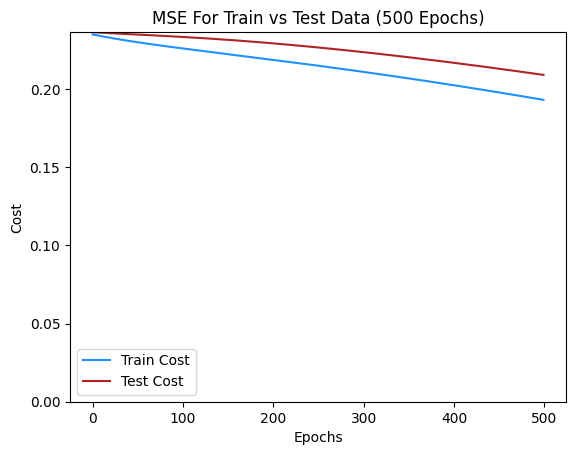

In [ ]:
# Define the parameters for learning rate and epochs
learning_rate = 0.1
epochs = 500
activation_type = 'sigmoid'
seed = 42

# Generate the weights and biases
W1, W2, W3, b1, b2, b3 = GenerateAllWeights_2(input_nodes, first_hidden_nodes, second_hidden_nodes, output_nodes, seed)

# Train the network, gathering the training and test error (remember what your cost function is currently calculating in your train loop)
start_time = time.time() # start time

train_cost_2, test_cost_2 = train_2(X_train, Y_train, X_test, Y_test, learning_rate, epochs, activation_type)

end_time = time.time() #end time
elapsed_time = end_time - start_time

# Calculate MSE from you returned costs (remember what your cost function is currently calculating in your train loop)
train_cost_2 = np.array(train_cost_2) / X_train.shape[0]
test_cost_2 = np.array(test_cost_2) / X_test.shape[0]

#### DO NOT ADJUST ####
plt.plot(np.arange(epochs), train_cost_2, label = 'Train Cost', color = 'dodgerblue')
plt.plot(np.arange(epochs), test_cost_2, label = 'Test Cost', color = 'firebrick')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title(f'MSE For Train vs Test Data ({epochs} Epochs)')
plt.ylim([0, np.max([np.max(test_cost_2), np.max(train_cost_2)])])
plt.legend()
plt.show()

#### Q8. Calculate your Test Accuracy using your `test_2()` function.

In [ ]:
# Calculate the accuracy on the test set using your test_2 function
test_2(X_test, Y_test, activation_type)

percent correct: 70.0


#### Plot the train and test errors for both of your models: 1 hidden layer vs 2 hidden layers. Just run this code chunk below. There is no need for you to adjust the code.

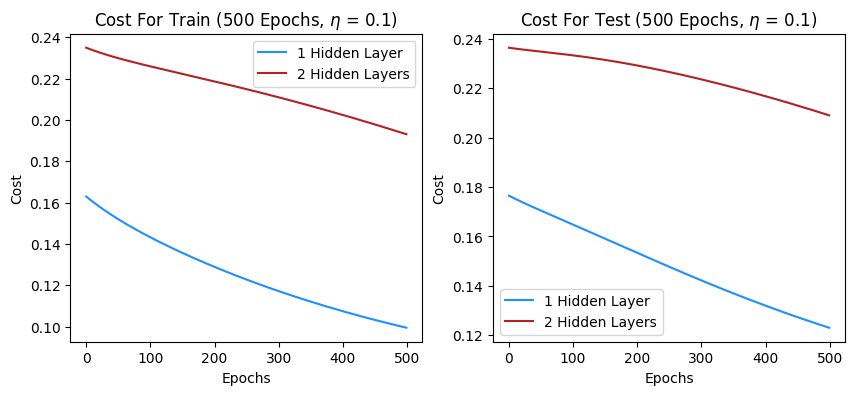

In [ ]:
# Define the plot
fig, ax = plt.subplots(1, 2, figsize = (10, 4))

# Plotting 1 layer train plot
ax[0].plot(np.arange(epochs), train_cost, label = '1 Hidden Layer', color = 'dodgerblue')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Cost')
ax[0].set_title(rf'Cost For Train ({epochs} Epochs, $\eta$ = {learning_rate})')

# Plotting 1 layer test plot
ax[1].plot(np.arange(epochs), test_cost, label = '1 Hidden Layer', color = 'dodgerblue')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Cost')
ax[1].set_title(rf'Cost For Test ({epochs} Epochs, $\eta$ = {learning_rate})')

# Plotting 2 layer train plot
ax[0].plot(np.arange(epochs), train_cost_2, label = '2 Hidden Layers', color = 'firebrick')

# Plotting 2 layer test plot
ax[1].plot(np.arange(epochs), test_cost_2, label = '2 Hidden Layers', color = 'firebrick')

# Final line to add legends and show the plot
ax[0].legend()
ax[1].legend()
plt.show()

#### **Q9: Compare your 1 hidden layer and 2 hidden layer models from the plots above in words below.**

- Compare the accuracy (you calculated and printed these earlier) of both models. Remember this is the output from the `test()` and `test_2()` functions.
- Next, compare the train and test MSE (`cost / n`) for both models.
- Which model produced the best test accuracy?
- Which model performed better? Justify your answer with the results shown in your code above and your generated plots.
- Did your 2-layer model overfit? Or did it underfit? Does adding more hidden layers guarentee better performance?

**Answer:**
  I got 88.75% from hidden layer = 1 whereas the accuracy went down to 70% from hidden layer =2. Thus, having 1 hidden layer provides more accuracy.

  1 hidden layer model has much lower train and test cost compared to the 2 hidden layer model.

  1 hidden layer model has the best test accuracy.

  Model with 1 hidden layer performs better as it has a higher test accuracy % and lower cost in both training and testing set (shown in the graph above this markdown). The 2-hidden layer model is neither underfitting or overfitting as there is not enough information to tell. But, we can see that 1 hidden layer model performs better.



## Part 3: Experimentation/Parameter Tuning (with 1-hidden-layer model)
Below you will run a series of experiments on your 1 Hidden Layer network. We have a series of values, or `hyperparameters`, that we can manipulate to change how the network behaves. Those `hyperparameters` for our case are: `Activation Function`, `Learning Rate`, `# of Hidden Nodes`. For each experiment, we will change only one variable at a time and keep the others constant. This allows us to isolate the effects of the `hyperparameters`.

We will be walking you through 4 different experiments that test:
- Our Baseline model
- Activation Functions: `'sigmoid'`, `'relu'`, and `'tanh'`
- Learning Rates: `0.5`, `0.1`, `0.01`, and `0.001`
- \# of Hidden Nodes: `3`, `5`, `7`, and `9`

while keeping the other parameters constant.

For each experiment (except for the baseline test), produce

a) A line graph comparing each parameter's train and test costs over each epoch.

b) Rows to be added to a table that lists the parameter you're testing, the final train cost, the final test cost, and the time it took to train. These will be combined to create a final table at the end of this section.

c) A summary of which parameter performed the best and why for this given experiemnt.

From here you should have a solid baseline as to which parameter values you want to test further in Part 4 to find the best parameters for your final model you submit for grading.



#### More instructions on the table(s):

You will create one table that contains the results for all 4 experiments. This will allow you to compare your experimental results to the baseline shown in the first row. For each experiment, you will track your parameters, what the train and test cost are, as well as the time it took to train. It will look like the markdown table below, but you will fill in the question marks and the other rows.

| Activation Function | Learning Rate | Epochs | Hidden Nodes | Train Cost | Test Cost| Time to Train |
| --------- |  --------- |  --------- |  --------- |  --------- |  ---------|  --------- |
| Sigmoid | 0.1  | 500 | 3 | ?  | ? | ? |
|  | | | |  |  | |

In [ ]:
### Start keeping track of variables and initialize your table
act = [] # Accuracy
lr = [] # Learning Rate
epc = [] # Epoch
hn = [] # Number of Hidden Nodes
trcst = [] # Train Cost
tstcst = [] # Test Cost
tot = [] # Time to train

###**Run a baseline test with the default values for all `hyperparameters`.**

#### Q1. For this training round, set `activation_type = 'sigmoid'`, `learning_rate = 0.1`, `epochs = 500`, and `hidden_nodes = 3`.



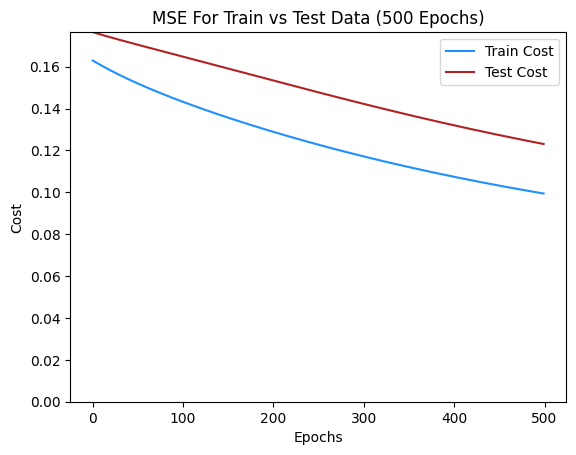

In [ ]:
# Define your parameters
activation_type = 'sigmoid'
learning_rate = 0.1
hidden_nodes = 3
epochs = 500

# Define your weights
W1, W2, b1, b2 = GenerateAllWeights(input_nodes, hidden_nodes, output_nodes, seed)


# Train your network (remember to calculate the time it takes to train - refer to Lab 12)
start_time = time.time()
train_cost, test_cost = train(X_train, Y_train, X_test, Y_test, learning_rate, epochs, activation_type)
end_time = time.time()
elapsed_time = end_time - start_time

# Calculate MSE (remember what your cost function is currently calculating in your train loop)
train_cost = np.array(train_cost) / X_train.shape[0]
test_cost = np.array(test_cost) / X_test.shape[0]

# Append parameters, costs, and time to your lists
lr.append(learning_rate)
epc.append(epochs)
act.append(activation_type)
hn.append(hidden_nodes)
trcst.append(train_cost[-1]) # adding -1 so it grabs the cost from the last epoch
tstcst.append(test_cost[-1])
tot.append(elapsed_time)


#### DO NOT ADJUST ####
plt.plot(np.arange(epochs), train_cost, label = 'Train Cost', color = 'dodgerblue')
plt.plot(np.arange(epochs), test_cost, label = 'Test Cost', color = 'firebrick')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title(f'MSE For Train vs Test Data ({epochs} Epochs)')
plt.ylim([0, np.max([np.max(test_cost), np.max(train_cost)])])
plt.legend()
plt.show()

### **Comparing Models with Different Activation Functions**

#### Q2. Train your model using the 3 different activation functions (`sigmoid`, `relu`, `tanh`) that you have created. For each activation function, record and report the training cost, testing cost, and runtime. **Make sure to append your new values to your lists for your table in the right spots!**

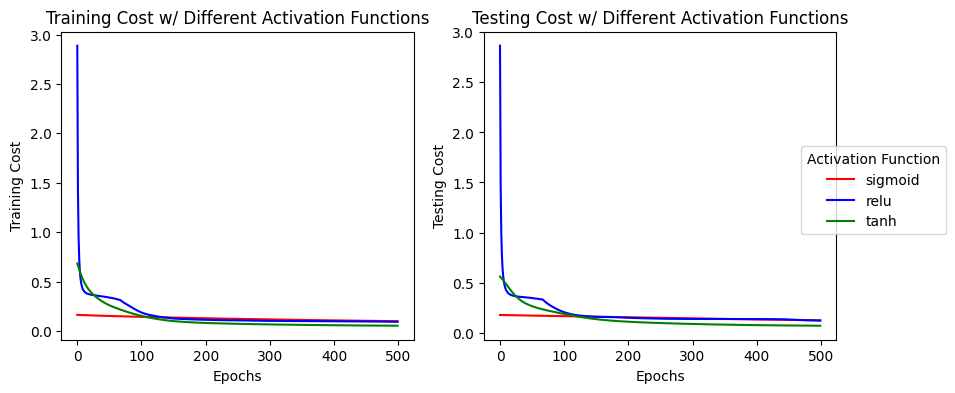

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Define a list of what your activaiton functions are
activation_types = ['sigmoid', 'relu', 'tanh']

# Define a dictionary of the activation functions and their colors
activation_colors = {'sigmoid': 'red', 'relu': 'blue', 'tanh': 'green'}

# Define the parameters: learning_rate and epochs (hidden nodes remain the same as your baseline)
# these are the same as baseline: (varying activation types this time)
learning_rate = 0.1
hidden_nodes = 3
epochs = 500

# Loop over the activation function types
for activation_type in activation_types:
  # Define your weights
  W1, W2, b1, b2 = GenerateAllWeights(input_nodes, hidden_nodes, output_nodes, seed)

  # Train your network (remember to calculate the time it takes to train - refer to Lab 12)
  start_time = time.time()
  train_cost, test_cost = train(X_train, Y_train, X_test, Y_test, learning_rate, epochs, activation_type)
  end_time = time.time()
  elapsed_time = end_time - start_time

  # Calculate MSE (remember what your cost function is currently calculating in your train loop)
  train_cost = np.array(train_cost) / X_train.shape[0]
  test_cost = np.array(test_cost) / X_test.shape[0]

  # Append new values to the lists for the table
  # Append parameters, costs, and time to your lists
  lr.append(learning_rate)
  epc.append(epochs)
  act.append(activation_type)
  hn.append(hidden_nodes)
  trcst.append(train_cost[-1])
  tstcst.append(test_cost[-1])
  tot.append(elapsed_time)

  #### DO NOT ADJUST ####
  # Add the test error line for the activation functions
  ax[0].plot(np.arange(epochs), train_cost, label = activation_type, color = activation_colors[activation_type])
  ax[1].plot(np.arange(epochs), test_cost, label = activation_type, color = activation_colors[activation_type])

#### DO NOT ADJUST ####
ax[0].set_title(r'Training Cost w/ Different Activation Functions')
ax[1].set_title(r'Testing Cost w/ Different Activation Functions')
ax[0].set_xlabel('Epochs')
ax[1].set_xlabel('Epochs')
ax[0].set_ylabel('Training Cost')
ax[1].set_ylabel('Testing Cost')
plt.legend(title = r'Activation Function', bbox_to_anchor=(1.33, 0.65))
plt.show()

#### Q3. Activation Function Experiment Summary

**Answer:** Training and Test costs mirror each other. However, activation functions vary slightly. Tanh seems to have the lower cost as the epochs increase and relu's training and testing cost seems to stay relatively similar as epochs increase.

### **Comparing Models with Different Learning Rates**

#### Q4. Compare your model with different learning rates. The learning rates you test should be `0.5, 0.1, 0.01, 0.001`. For each learning rate, calculate and report the training cost, testing cost, and runtime. **Note:** This should look very similar to what you did in the previous question for activation functions. **Make sure to append your new values to your lists for your table in the right spots!**

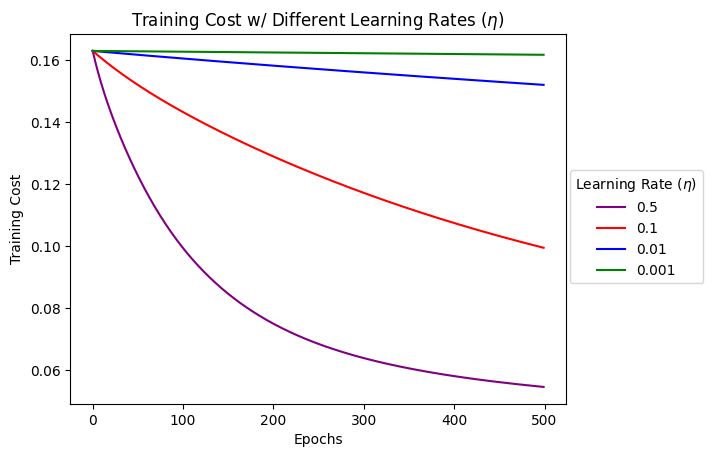

In [ ]:
# Define a list of what your learning rates are
learning_rates = [0.5, 0.1, 0.01, 0.001]

# Define a dictionary of the learning rates and their colors
learning_rate_colors = {0.5: 'purple', 0.1: 'red', 0.01: 'blue', 0.001: 'green'}

# Define the parameters: activation type and epochs (hidden nodes remain the same as your baseline)
# same as the baseline
activation_type = 'sigmoid'
epochs = 500
hidden_nodes = 3
# varying learning rates

# Loop over the activation function types, generating weights, traning the model, tracking time, and recieving the training and testing costs (same process as above)

for learning_rate in learning_rates:
  # Define your weights
  W1, W2, b1, b2 = GenerateAllWeights(input_nodes, hidden_nodes, output_nodes, seed)

  # Train your network (remember to calculate the time it takes to train - refer to Lab 12)
  start_time = time.time()
  train_cost, test_cost = train(X_train, Y_train, X_test, Y_test, learning_rate, epochs, activation_type)
  end_time = time.time()
  elapsed_time = end_time - start_time

  # Calculate MSE (remember what your cost function is currently calculating in your train loop)
  train_cost = np.array(train_cost) / X_train.shape[0]
  test_cost = np.array(test_cost) / X_test.shape[0]

  # Append new values to the lists for the table
  # Append parameters, costs, and time to your lists
  lr.append(learning_rate)
  epc.append(epochs)
  hn.append(hidden_nodes)
  act.append(activation_type)
  trcst.append(train_cost[-1])
  tstcst.append(test_cost[-1])
  tot.append(elapsed_time)


  #### DO NOT ADJUST ####
  plt.plot(np.arange(epochs), train_cost, label = learning_rate, color = learning_rate_colors[learning_rate])

plt.title(r'Training Cost w/ Different Learning Rates ($\eta$)')
plt.xlabel('Epochs')
plt.ylabel('Training Cost')
plt.legend(title = r'Learning Rate ($\eta$)', bbox_to_anchor=(1.29, 0.65))
plt.show()

#### Q5. Learning Rate Experiment Summary

**Additional question to answer:** From your plot, what can you say about the convergence rate for the different learning rate values? Does a larger or smaller learning rate result in a faster convergence rate?

**Answer:** The higher the learning rate is, the faster the convergence rate is. The training cost falls the fastest over epochs when learning rate is 0.5.

### **Comparing a Different Number of Hidden nodes**

#### Q6. Compare your model with different numbers of hidden nodes. The number of hidden nodes you test should be `3, 5, 7, 9`. For each number of hidden nodes, calculate and report the training cost, testing cost, and runtime. **Note:** This should look very similar to what you did in the previous question and for activation functions. **Make sure to append your new values to your lists for your table in the right spots!**

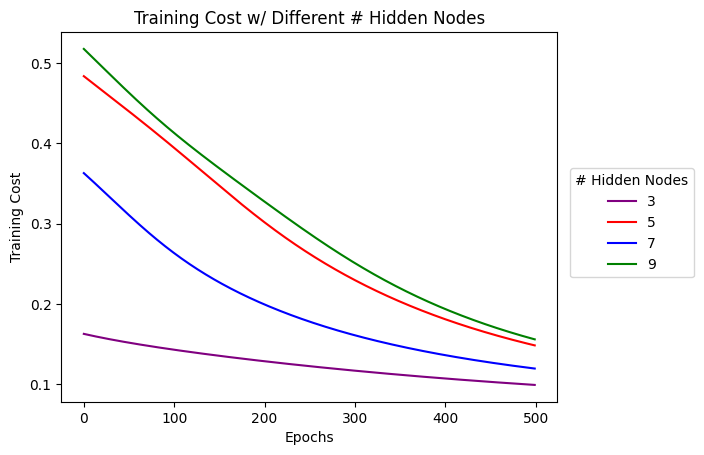

In [ ]:
# Define a list of what your learning rates are
num_hidden_nodes = [3, 5, 7, 9]

# Define a dictionary of the learning rates and their colors
hidden_node_colors = {3: 'purple', 5: 'red', 7: 'blue', 9: 'green'}

# Define the parameters: learning_rate, epochs, and activation type
# same as baseline:
activation_type = 'sigmoid'
learning_rate = 0.1
epochs = 500
# varying hidden_nodes

# Loop over the activation function types, generating weights, traning the model, tracking time, and recieving the training and testing costs (same process as above)
for hidden_nodes in num_hidden_nodes:
  # Define your weights
  W1, W2, b1, b2 = GenerateAllWeights(input_nodes, hidden_nodes, output_nodes, seed)

  # Train your network (remember to calculate the time it takes to train - refer to Lab 12)
  start_time = time.time()
  train_cost, test_cost = train(X_train, Y_train, X_test, Y_test, learning_rate, epochs, activation_type)
  end_time = time.time()
  elapsed_time = end_time - start_time

  # Calculate MSE (remember what your cost function is currently calculating in your train loop)
  train_cost = np.array(train_cost) / X_train.shape[0]
  test_cost = np.array(test_cost) / X_test.shape[0]

  # Append new values to the lists for the table
  # Append parameters, costs, and time to your lists
  lr.append(learning_rate)
  act.append(activation_type)
  epc.append(epochs)
  hn.append(hidden_nodes)
  trcst.append(train_cost[-1])
  tstcst.append(test_cost[-1])
  tot.append(elapsed_time)

  #### DO NOT ADJUST ####
  plt.plot(np.arange(epochs), train_cost, label = hidden_nodes, color = hidden_node_colors[hidden_nodes])

plt.title(r'Training Cost w/ Different # Hidden Nodes')
plt.xlabel('Epochs')
plt.ylabel('Training Cost')
plt.legend(title = r'# Hidden Nodes', bbox_to_anchor=(1.29, 0.65))
plt.show()

Q6 Summary: hidden nodes 3 has the lowest training cost. Although it looks like the training costs become closer together (decreases at a decreasing rate ) as epochs increase. Hidden nodes=3 already provides low training cost at an early epochs value whereas other hidden node values get to low training cost at higher epochs values.

#### **Q7: Print out your Final Table using the columns you generated in each of your experiments above**

Reminder: Your table will look like the table below but with 12 rows instead of 1:

| Activation Function | Learning Rate | Epochs | Hidden Nodes | Train Cost | Test Cost| Time to Train |
| --------- |  --------- |  --------- |  --------- |  --------- |  ---------|  --------- |
| Sigmoid | 0.1  | 500 | 3 | ?  | ? | ? |

In [ ]:
### Print final table here (shold be 12 rows total) - Make sure everything looks right!

# This code will put your columns together and create a list from them.
combined_lists = list(zip(act, lr, epc, hn, trcst, tstcst, tot))

# Place your combined_lists into a pandas data frame, add column headers using the
final_table = pd.DataFrame(combined_lists, columns=['activation_type', 'learning_rate', 'epochs', 'hidden_nodes', 'train_costs', 'test_costs', 'total_time'])
# Print your data frame out for us to view
print(final_table)


   activation_type  learning_rate  epochs  hidden_nodes  train_costs  \
0          sigmoid          0.100     500             3     0.099414   
1          sigmoid          0.100     500             3     0.099414   
2             relu          0.100     500             3     0.093419   
3             tanh          0.100     500             3     0.053468   
4          sigmoid          0.500     500             3     0.054521   
5          sigmoid          0.100     500             3     0.099414   
6          sigmoid          0.010     500             3     0.151969   
7          sigmoid          0.001     500             3     0.161670   
8          sigmoid          0.100     500             3     0.099414   
9          sigmoid          0.100     500             5     0.148584   
10         sigmoid          0.100     500             7     0.119790   
11         sigmoid          0.100     500             9     0.156100   

    test_costs  total_time  
0     0.123059   11.621023  
1    

**Q8: From your table shown above, what values or range of values for each parameter would you like to test further in the section below? Justify why you want to explore them more. Note: For the next section, you can try to combine different permutations of each parameter value instead of always keeping constant.**

**Answer:** tanh and sigmoid seems to be close, so I'll try all both to compare which one is better. From the graph, tanh had lower cost as epochs increased. I'd like to test if **increasing epochs with 'tanh'** would increase the accuracy. I also would like to explore the learning_rate as it drastically changes the cost, but greater the learning_rate is, the lower/better the cost is. I wonder if we try **even higher learning_rate**, the test cost and accuracy would get better. The hidden nodes don't seem to affect the testing score as much and hidden node=3 gives the lowest cost. But I'll test different hidden nodes at the end if other hidden node values compliment the chosen parameters.

## Part 4: Further Experimentation/Parameter Tuning
In this part you will experiment further to find the values of the parameters (activation function, epochs, learning rate, hidden nodes) that best train your model to produce the highest test accuracy ON OUR SYNTHETIC DATASET. This means that you need to find the parameters that not only produce the best test accuracy but also don't overfit the training data.

- Do not change the cost functions, initialization method, random seed (42), or number of layers in the model (use the functions for your 1-layer model).

- Include a plot for your best model of train and test error with a description of the plot including how many epochs it took to converge. Document your process by writing it out.

I'll start with defining the parameters based on my intuition from looking at the final_table.

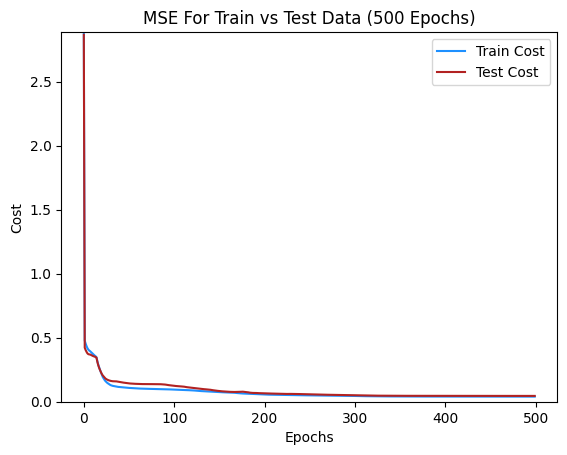

In [ ]:
# Insert your experiments of different values below, be creative with what you try and justify your choices!
# Define your parameters

# Given parameters that I'm not changing
input_nodes = 6
output_nodes = 1
seed = 42

# Initial guess for parameters
epochs = 500 # default from the table
learning_rate = 0.5  # had the lowest test cost
activation_type = 'relu' # because it's the most common activation function
hidden_nodes = 3 # because it has the lowest test cost

# Define your weights
W1, W2, b1, b2 = GenerateAllWeights(input_nodes, hidden_nodes, output_nodes, seed)

# Train your network (remember to calculate the time it takes to train - refer to Lab 12)
train_cost, test_cost = train(X_train, Y_train, X_test, Y_test, learning_rate, epochs, activation_type)

# Calculate MSE (remember what your cost function is currently calculating in your train loop)
train_cost = np.array(train_cost) / X_train.shape[0]
test_cost = np.array(test_cost) / X_test.shape[0]
#### DO NOT ADJUST ####
plt.plot(np.arange(epochs), train_cost, label = 'Train Cost', color = 'dodgerblue')
plt.plot(np.arange(epochs), test_cost, label = 'Test Cost', color = 'firebrick')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title(f'MSE For Train vs Test Data ({epochs} Epochs)')
plt.ylim([0, np.max([np.max(test_cost), np.max(train_cost)])])
plt.legend()
plt.show()


In [ ]:
test(X_test, Y_test, activation_type)

percent correct: 93.75


Notes on changes on parameters:

(initial guess accuracy score: 93.75)

1.
- changed activation type to 'tanh' (from relu)
- left all the other parameters the same as before

result: accuracy score went down to 92.5

2.
- increased the epochs to 700
- everything else is the same (tanh, 3 hidden nodes, 0.5 learning rate)

result: Stayed the same. Increasing the epochs to 700 with tanh didn't change anything.

3.
- changed activation to 'relu' since tanh didn't work out
- change learning rate to 0.1
- everything else the same (500 epochs, 3 hidden nodes)

result: lower learning rate led to an accuracy score to go down to 85. So, I think we should stick to learning_rate=0.5 going forward.

4.
- changed learning rate back to 0.5
- activation type still 'relu'
- changed epochs to 700

result: accuracy score is the same as initial guess. 93.75. Changing epochs doesn't seem to affect with both tanh and relu.

Back to using tanh, continuing to explore with tanh, but with different hidden nodes and epochs
5.
- changed hidden nodes to 5 (increasing the hidden nodes this time)
- act type: tanh
- epochs=700
- learning rate=0.5

accuracy: 95; highest so far;

6. try the above with relu to see if relu performs better with higher hidden nodes

result: accuracy dropped to 55, bad idea.

7. try the above with sigmoid

result: accuracy is 92.5. Pretty good, but still not as high as tanh.

At this point, step 5 seems to be the best, so tune based on these parameters.

8.
- change the activation type back to tanh
- learning rate = 0.5
- epochs = 700
- hidden nodes=7 (increasing to see if it affects accuracy compared to 5 hidden nodes)

result: accuracy decreased to 92.5. Seems to be better to keep the hidden nodes at 5.

9.
- changing the hidden nodes back to 5
- increasing epochs to 900 (from 700)
- everything else is the same (learning rate = 0.5, tanh)

result: accuracy increased to 96.25; HIGHEST accuracy so far.


Based on the experiments so far, my best guess is:

epochs = 900
activation type = tanh
hidden nodes = 5
learning rate = 0.5



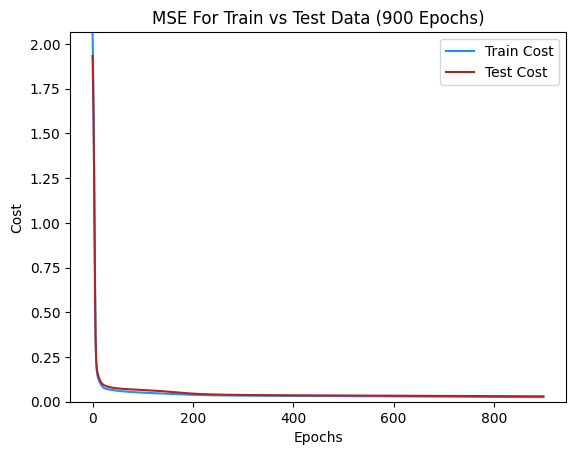

In [ ]:
# Define your parameters

# Given parameters that I'm not changing
input_nodes = 6
output_nodes = 1
seed = 42

# Best initial guess
epochs = 900
learning_rate = 0.5
activation_type = 'tanh'
hidden_nodes = 5

# Define your weights
W1, W2, b1, b2 = GenerateAllWeights(input_nodes, hidden_nodes, output_nodes, seed)

# Train your network (remember to calculate the time it takes to train - refer to Lab 12)
train_cost, test_cost = train(X_train, Y_train, X_test, Y_test, learning_rate, epochs, activation_type)

# Calculate MSE (remember what your cost function is currently calculating in your train loop)
train_cost = np.array(train_cost) / X_train.shape[0]
test_cost = np.array(test_cost) / X_test.shape[0]
#### DO NOT ADJUST ####
plt.plot(np.arange(epochs), train_cost, label = 'Train Cost', color = 'dodgerblue')
plt.plot(np.arange(epochs), test_cost, label = 'Test Cost', color = 'firebrick')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title(f'MSE For Train vs Test Data ({epochs} Epochs)')
plt.ylim([0, np.max([np.max(test_cost), np.max(train_cost)])])
plt.legend()
plt.show()

In [ ]:
test(X_test, Y_test, activation_type)

percent correct: 96.25


Looking from the graph above, the model seems to perform very well. However, the model doesn't improve significantly after epoch=200. It means that the model may be overfitting at too high epoch value even though the accuracy level is high for training and testing data. In order to predict the unseen data the model will be tested on accurately, we need to make sure that the model is not underfitting or overfitting. Thus, I'll be picking my final parameters to be epoch=200 and everything else the same as in the graph above.

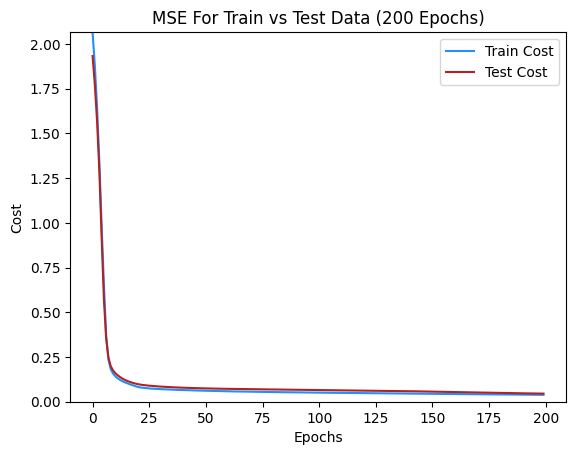

In [ ]:
# Define your parameters

# Given parameters that I'm not changing
input_nodes = 6
output_nodes = 1
seed = 42

# Best initial guess
epochs = 200
learning_rate = 0.5
activation_type = 'tanh'
hidden_nodes = 5

# Define your weights
W1, W2, b1, b2 = GenerateAllWeights(input_nodes, hidden_nodes, output_nodes, seed)

# Train your network (remember to calculate the time it takes to train - refer to Lab 12)
train_cost, test_cost = train(X_train, Y_train, X_test, Y_test, learning_rate, epochs, activation_type)

# Calculate MSE (remember what your cost function is currently calculating in your train loop)
train_cost = np.array(train_cost) / X_train.shape[0]
test_cost = np.array(test_cost) / X_test.shape[0]
#### DO NOT ADJUST ####
plt.plot(np.arange(epochs), train_cost, label = 'Train Cost', color = 'dodgerblue')
plt.plot(np.arange(epochs), test_cost, label = 'Test Cost', color = 'firebrick')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title(f'MSE For Train vs Test Data ({epochs} Epochs)')
plt.ylim([0, np.max([np.max(test_cost), np.max(train_cost)])])
plt.legend()
plt.show()

In [ ]:
####### Insert Best Parameters Here (hard code these numbers) for your best 1-layer model #######
# Leave this code chunk at the bottom of your Part 4
epochs = 200
learning_rate = 0.5
activation_type = 'tanh'
input_nodes = 6 # given
hidden_nodes = 5
output_nodes = 1 # given
seed = 42 # given

In [ ]:
test(X_test, Y_test, activation_type)

percent correct: 92.5


Description of the plot:

I chose the final parameters based on my experiment results. I visualized the model that gave me the highest accuracy score, but set the epoch level based on when it stopped improving significantly. By cutting the epoch level early, I'm avoiding overfitting.

My final plot also shows that the train and test costs are very close to each other. This means that the model performs just as well on the test data than it did on the train data.

## Part 5: Comprehension Questions

#### Q1: What is the main difference between linear regression models and neural networks? Which piece(s) of the model introduce non-linearity into neural networks?

**Answer:** The main difference is that linear regression captures linear relationship between input and output variables whereas neural networks use activation functions like relu and sigmoid to capture the non linear relationship. The bias is also a non-linear part of neural network. In other words, neural network has more flexibility to capture complex relationships compared to linear regression.

#### Q2: Did you notice a trade-off between training time and accuracy? Where or at what point?

**Answer:** According to my final_table, I don't see a strong correlation between the training time and cost. During my experimentation, I also didn't notice a trade off pattern between training time and accuracy. This might be because our data is small enough that training time is not a big issue for us.

#### Q3: When training multiple times, do the weights change? Is there a unique solution? Remember how OLS has a unique solution that we get to every time. To prove your answer, train 2 networks with different initial weights (i.e. using different seeds for `GenerateAllWeights()`) but the same hyperpamaters. Do the weights match after the same amount of epochs? Note: Use the training seeds provided and be sure to print the weights from Network 1 before training Network 2, otherwise they will be overwritten and you won't be able to compare.

**Answer:**
With different seeds, the weights changed. Thus, different seeds didn't converge into the same weights/unique solution.  

In [ ]:
#### DO NOT ADJUST ####
### Train your first network, print out the weights at the end of training
training_1_seed = 370


epochs = 500
learning_rate = 0.5
activation_type = 'tanh'
input_nodes = 6 # given
hidden_nodes = 5
output_nodes = 1 # given

# Define your weights
W1, W2, b1, b2 = GenerateAllWeights(input_nodes, hidden_nodes, output_nodes, training_1_seed)

# Train your network
train_cost, test_cost = train(X_train, Y_train, X_test, Y_test, learning_rate, epochs, activation_type)

# Print
print(W1, W2)

[[-1.3760099  -0.80496825  0.00824979  0.40789213 -0.75220003 -0.59881369]
 [ 0.4838606  -0.27608324 -1.02023759  0.65784178  0.01101374 -0.01734821]
 [ 0.89402577  1.00479079 -1.19190156  0.2485043   0.19334166 -0.0317078 ]
 [-0.22624042  0.11720399  1.01645645  0.03267447  0.02619153  0.03740482]
 [ 0.26481761 -0.20113909 -0.09541962  2.28874977  0.27060648  0.09917147]] [[-0.00366902  0.86218967 -0.94586805  0.49409308 -0.72237408]]


In [ ]:
#### DO NOT ADJUST ####
### Train your second network, print out the weights at the end of training
training_2_seed = 385

epochs = 100
learning_rate = 0.5
activation_type = 'tanh'
input_nodes = 6 # given
hidden_nodes = 5
output_nodes = 1 # given

# Define your weights
W1, W2, b1, b2 = GenerateAllWeights(input_nodes, hidden_nodes, output_nodes, training_2_seed)

# Train your network
train_cost, test_cost = train(X_train, Y_train, X_test, Y_test, learning_rate, epochs, activation_type)

# Print
print(W1, W2)

[[-0.01190126 -0.0053044  -0.24100653  0.8502009   0.36944571 -0.88945989]
 [ 0.23193278 -0.14706157 -0.74300142 -0.0999739  -0.08476762 -0.87959474]
 [ 0.52205926 -2.23025585  0.55227763 -0.67898653 -0.07401517  0.59292045]
 [ 0.39832658  0.82006644 -0.25870592  0.6230671   0.027536    0.33052642]
 [ 0.17668608 -0.13397986 -0.28055292  0.06285723 -0.05054845 -1.1623588 ]] [[-0.40224804 -1.06576609  0.05863025 -0.66666762  1.1927124 ]]


## For TA Grading Purposes (Leave in and do not touch)

In [ ]:
####### FOR TA's TO GRADE/TEST FINAL MODEL- Leave at Bottom #######
#### DO NOT ADJUST ####

In [ ]:
# Download Data
from google.colab import drive
drive.mount('/content/drive')

synth_x = '/content/drive/My Drive/synth_x.csv'
synth_x = pd.read_csv(synth_x)

synth_y = '/content/drive/My Drive/synth_y.csv'
synth_y = pd.read_csv(synth_y)

synth_x = synth_x.to_numpy()
synth_y = synth_y.to_numpy()


# Test Student Model - Parameters defined above by student
epochs = epochs
learning_rate = learning_rate
activation_type = activation_type
input_nodes = input_nodes
hidden_nodes = hidden_nodes
output_nodes = output_nodes
seed = 42

# Initialization

W1, W2, b1, b2 = GenerateAllWeights(input_nodes, hidden_nodes, output_nodes, seed)
print(W1) #Initial weights

# Model

W1, W2, b1, b2 = GenerateAllWeights(input_nodes, hidden_nodes, output_nodes, seed)
train_cost, test_cost = train(X_train, Y_train, X_test, Y_test, learning_rate, epochs, activation_type)

train_cost = np.array(train_cost) / X_train.shape[0]
test_cost = np.array(test_cost)

print(train_cost[-1])
print(test_cost[-1])
print(W1) # End weights


# Plot
plt.plot(np.arange(epochs), train_cost, label = 'Train Cost', color = 'dodgerblue')
plt.plot(np.arange(epochs), test_cost, label = 'Test Cost', color = 'firebrick')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title(f'MSE For Train vs Test Data ({epochs} Epochs)')
plt.ylim([0, np.max([np.max(test_cost), np.max(train_cost)])])
plt.legend()
plt.show()

# Results

their_test_accuracy = test(X_test, Y_test, activation_type)
print(their_test_accuracy)

our_test_accuracy = test(synth_x, synth_y, activation_type)
print(our_test_accuracy)

MessageError: Error: credential propagation was unsuccessful